### Maxwell A. Fine 14880725
### Assingment 1: Stastical Methods in Astrophysics

In [46]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import scipy.stats as sps
from scipy.stats import ttest_ind


# Set a seed for reproducibility
random_seed = 42


### reconmened pre-assingment data processing as given in A1 handout

In [47]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

clcounts = stars.groupby(['Name']).size().reset_index(name='count')

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


ColDefs(
    name = 'Name'; format = 'A20'; start = 1
    name = 'ID'; format = 'I4'; disp = 'I4'; start = 22
    name = 'GaiaDR3'; format = 'I19'; disp = 'I19'; start = 27
    name = 'inrt'; format = 'I1'; disp = 'I1'; start = 47
    name = 'Prob'; format = 'F10.8'; disp = 'F10.8'; start = 49
    name = 'RAdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 60
    name = 'e_RAdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 73
    name = 'DEdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 84
    name = 'e_DEdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 97
    name = 'GLON'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 108
    name = 'GLAT'; format = 'E11.4'; unit = 'deg'; disp = 'E11.4'; start = 121
    name = 'pmRA'; format = 'E11.4'; unit = 'mas/yr'; disp = 'E11.4'; start = 133
    name = 'e_pmRA'; format = 'F10.8'; unit = 'mas/yr'; disp = 'F10.8'; start = 145
    name = 'pmDE'; format = 'E11.4'; unit = 'mas/yr'; d

### Task 1:

The parameter Prob gives a conservative estimate of the probability that the star is associated with
the cluster, by doing a ‘clustering’3 analysis of the stars in the 5-dimensional astrometric parameter
space, i.e. using RAdeg, DEdeg, Plx, pmRA and pmDE. Use the Pandas sample function on your
cluster star counts dataframe, to randomly select 4 clusters, only from clusters with >1000 candidate
stars. Split each cluster into two subsamples corresponding to stars with Prob ≤ 0.8 and stars with
Prob > 0.8 and for each cluster, make a scatter plot matrix (see the extras episode) to show on the
same figure the data points for both subsamples on this 5-D parameter space. Note that it is fine to 


### Idea & Assumptions 

* Assumed data is normally distrubuted for each parameter / variable

* We can use the pandas sample function to randomly select 4 clusters, from clusters with >1000 stars which we can simply slice for. 
    - The col name we are looking for is 'name' this represents the cluster names
        * this is what the starter code does!
    - then slice 
    - then randomly pick

* Next we can slice again to split the clusters into Prob ≤ 0.8 and stars with
Prob > 0.8 and for each cluster.

* First time using Pandas so I a assuming we can slice easily

* No idea what a scatter plot matrix is so, we will have to look at the extras episode before attemptng to plot

* To test my code if it works as expected, we will be using a pre-determined seed for pd.sample



### Task 1: coding cell below

In [48]:
# task 1 code

# Filter names with more than 1000 entries
clusters_over_1000 = clcounts[clcounts['count'] > 1000]

# Randomly pick 4 names with more than 1000 entries
randomly_picked_clusters = clusters_over_1000.sample(n=4, random_state=random_seed)

# print for user
print('Randomly Picked Clusters\n', randomly_picked_clusters, '\n')


# for loop to split each cluster by Prob ≤ 0.8
df_high = []
df_low = []

for index, cluster in randomly_picked_clusters.iterrows():

    # Create an empty DataFrame with desired columns
    result_high_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    result_low_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    # sort and slice data
    cluster_name= cluster['Name']
    clustter_data = stars[stars['Name'] == cluster_name]
    higher_8_prob = clustter_data[clustter_data['Prob'] > 0.8]
    lower_8_prob = clustter_data[clustter_data['Prob'] <= 0.8]

    # Add to DataFrames
    # Replace append with concat
    result_high_df = pd.concat([result_high_df, pd.DataFrame({
        'Name': [cluster_name],
        'Higher_8_Prob': [higher_8_prob.shape[0]],
        'Lower_8_Prob': [lower_8_prob.shape[0]],
        'RAdeg': [higher_8_prob['RAdeg'].tolist()],
        'DEdeg': [higher_8_prob['DEdeg'].tolist()],
        'Plx': [higher_8_prob['Plx'].tolist()],
        'pmRA': [higher_8_prob['pmRA'].tolist()],
        'pmDE': [higher_8_prob['pmDE'].tolist()],
    })], ignore_index=True)

    result_low_df = pd.concat([result_low_df, pd.DataFrame({
        'Name': [cluster_name],
        'Higher_8_Prob': [higher_8_prob.shape[0]],
        'Lower_8_Prob': [lower_8_prob.shape[0]],
        'RAdeg': [lower_8_prob['RAdeg'].tolist()],
        'DEdeg': [lower_8_prob['DEdeg'].tolist()],
        'Plx': [lower_8_prob['Plx'].tolist()],
        'pmRA': [lower_8_prob['pmRA'].tolist()],
        'pmDE': [lower_8_prob['pmDE'].tolist()],
    })], ignore_index=True)


    df_high.append(result_high_df)
    df_low.append(result_low_df)
    # no need to do this list stuff! its already accounted for




Randomly Picked Clusters
                Name  count
4746       NGC_6475   1427
1327  Collinder_261   3071
4565       NGC_2506   2465
4553       NGC_2447   1043 



### Task 1: plotting cell below

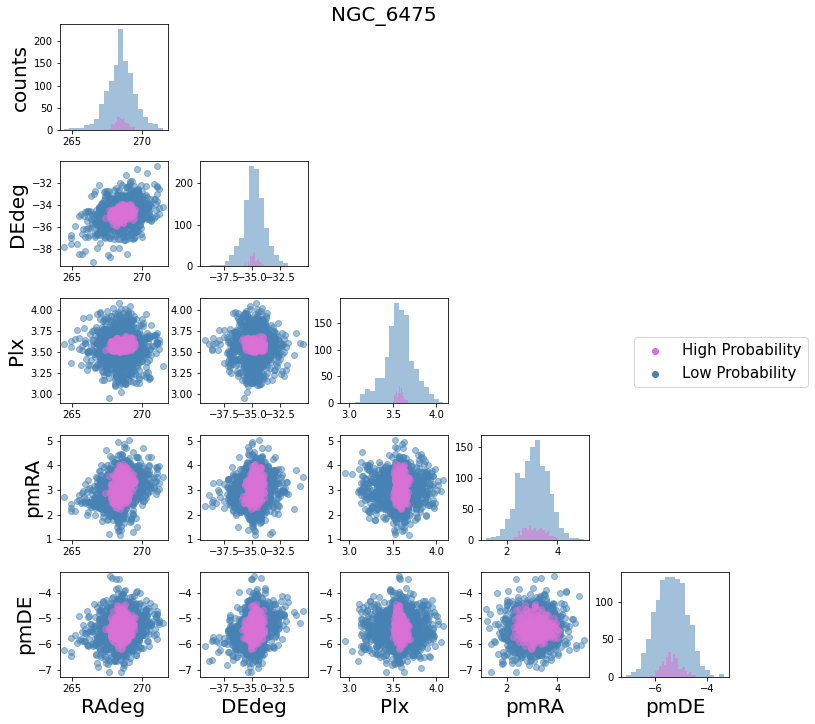

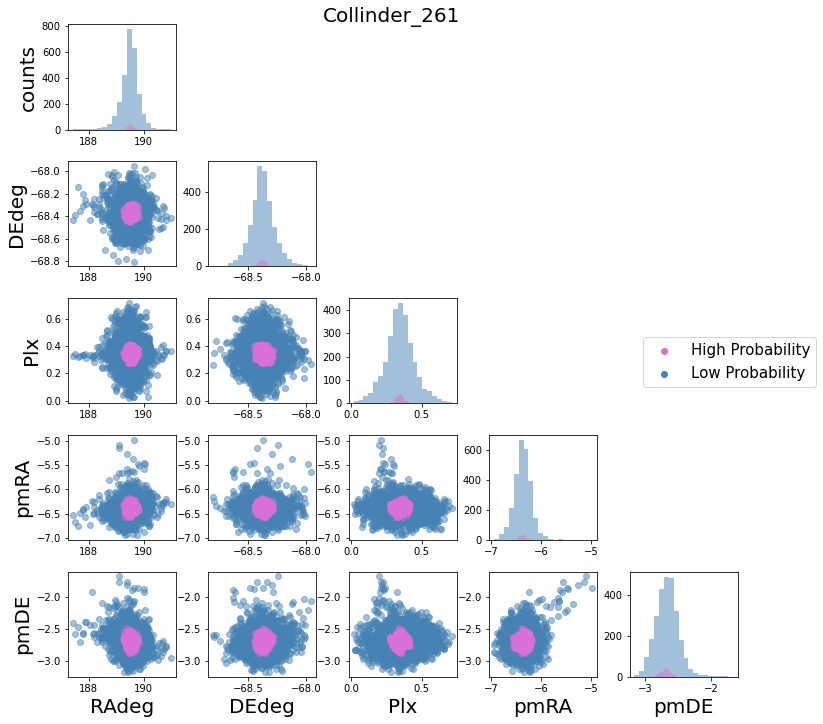

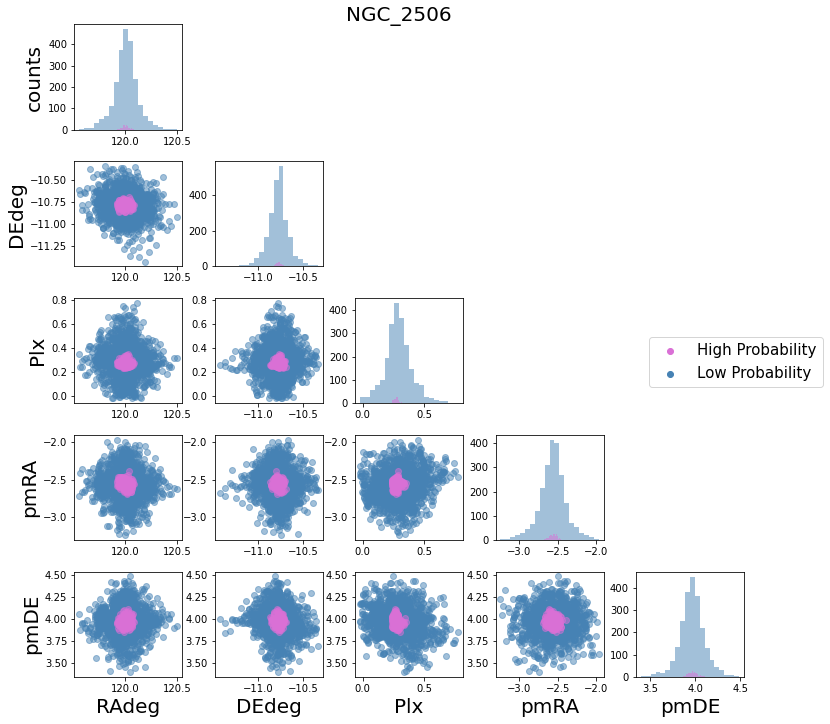

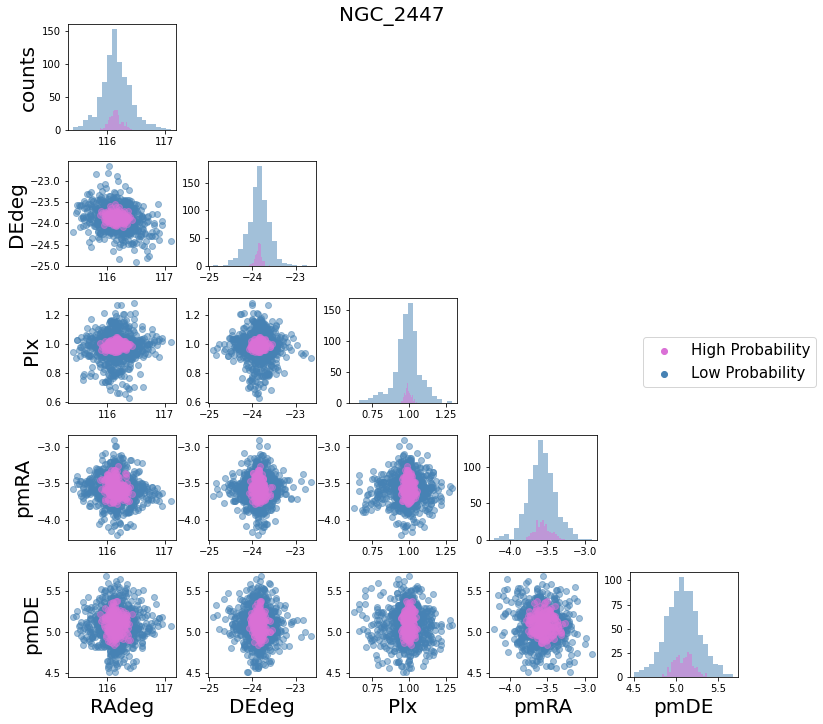

In [49]:

# Define labels and colors
ndims = len(['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE'])
labels = ['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']
color_high = 'orchid'
color_low = 'steelblue'

# nested for loop for plotting

for k in range(len(df_low)):
    fig, axes = plt.subplots(ndims, ndims, figsize=(12, 12))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    plotting_df = df_low[k] 
    for i in range(ndims):  # y dimension of the grid
        for j in range(ndims):  # x dimension of the grid
            if i == j:
                
                axes[i, j].hist(plotting_df[labels[i]].values, bins=20, color=color_low, alpha=0.5)
            elif i > j:
        
                axes[i, j].scatter(plotting_df[labels[j]].values[0], plotting_df[labels[i]].values[0], color=color_low, alpha=0.5,)
            else:
                axes[i, j].axis('off')

            if j == 0:
                if i == j:
                    axes[i, j].set_ylabel('counts', fontsize=20)
                else:
                    axes[i, j].set_ylabel(labels[i], fontsize=20)

            if i == ndims - 1:
                axes[i, j].set_xlabel(labels[j], fontsize=20)

    plotting_df = df_high[k]
    for i in range(ndims):  # y dimension of the grid
        for j in range(ndims):  # x dimension of the grid
            if i == j:
                
                axes[i, j].hist(plotting_df[labels[i]].values, bins=20, color=color_high, alpha=0.5)
            elif i > j:
                axes[i, j].scatter(plotting_df[labels[j]].values[0], plotting_df[labels[i]].values[0], color=color_high, alpha=0.5, )
            else:
                axes[i, j].axis('off')

            if j == 0:
                if i == j:
                    axes[i, j].set_ylabel('counts', fontsize=20)
                else:
                    axes[i, j].set_ylabel(labels[i], fontsize=20)

            if i == ndims - 1:
                axes[i, j].set_xlabel(labels[j], fontsize=20)

    # inspired by john to do a dummy plot for the legend
    plt.scatter([],[], label='High Probability', color=color_high)
    plt.scatter([],[], label='Low Probability', color=color_low)
    fig.legend(loc=7, fontsize=15)

    plt.suptitle(plotting_df['Name'][0], size=20, y=0.9)
    #plt.savefig('max_1.1_wip.png')
    plt.show()


### Explain: what is the likely reason for the differences between the distributions of points shown by each subsample?

### Task 2:

An interesting question is whether there is any spatial (RA and Dec) variation of the other astrometric
and photometric parameters in each cluster Now:

### A
a. Select a cluster from your sample (your choice but you can randomly select from the clusters
if you wish) and split it into 2 subsamples in RA, corresponding to stars with RA: i) greater
than the mean RA, ii) less than the mean RA. Do the same for Dec, to create 2 subsamples
selected on Dec. Then for the RA-selected subsamples, plot a figure with 5 separate subplots
(e.g. side-by-side) which show the histograms of the following parameters for each of the 2
subsamples: Plx, pmRA, pmDE, Gmag and BP-RP. I.e. each subplot will show two
histograms, one for each subsample, so you can compare the distributions for stars on one
side of the cluster vs the other. Repeat this for the 2 subsamples selected on Dec.

### B
b. Use t-tests to compare the 2 subsamples in RA and then the 2 subsamples in Dec for the
following parameters: Plx, pmRA, pmDE, Gmag and BP-RP. For the t-test you can assume
populations with the same variance.
I.e. you will do 5 t-tests for the subsamples selected on RA and 5 for the subsamples selected
on Dec, to see if there is any evidence that the populations of stars which each subsample is
drawn from is different from the other subsample, i.e. does it change with position in the
cluster?

### C
c. Comment on the implications of your test results, and repeat the same procedure for two
other clusters. Based on the parameter distributions, is the t-test an appropriate test in all
cases?

### Task 2: Starter Code

In [50]:
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']

### 2A:

Idea & Assumptions: 
* Assumed data is normally distrubuted for each parameter / variable
* we use pandas to sort the data into the 2 subgroups for each RA, DEC and then plot
* plotting seams like a hassel, and my current method is not ideal

Name                       ASCC_100
ID                               50
GaiaDR3         2090434220185542272
inrt                              1
Prob                        0.86006
RAdeg                    283.554601
e_RAdeg                    0.008289
DEdeg                     32.903944
e_DEdeg                    0.010413
GLON                      63.106527
GLAT                          13.81
pmRA                          1.629
e_pmRA                     0.010936
pmDE                         -3.277
e_pmDE                     0.012136
Plx                           2.893
e_Plx                      0.010677
pscol                           0.0
e_pscol                         0.0
PlxpmRACor                  -0.1806
PlxpmDECor                -0.004024
pmRApmDECor                 -0.1404
PlxpscolCor                     0.0
pmRApscolCor                    0.0
pmDEpscolCor                    0.0
Solved                           31
ELAT                      55.393353
nueff                       

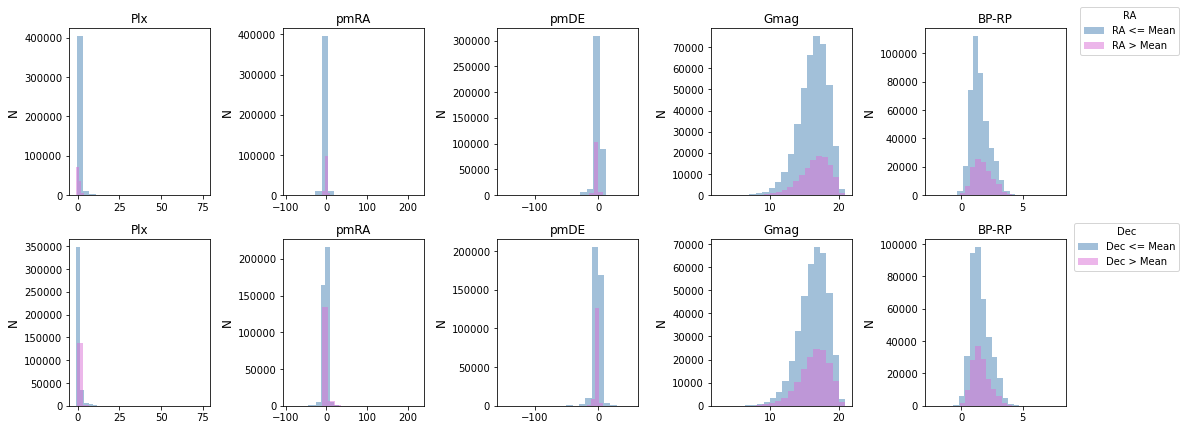

In [51]:
# Choose a random cluster from your sample with a seed for reproducibility
selected_cluster = stars_hiprob.sample(n=1, random_state=random_seed).iloc[0]
print(selected_cluster)
print(selected_cluster['Name'])

# Calculate mean RA and Dec
mean_RA = selected_cluster['RAdeg'].mean()
mean_Dec = selected_cluster['DEdeg'].mean()

# Split into subsamples based on RA and Dec
ra_subsample_greater = stars_hiprob[stars_hiprob['RAdeg'] > mean_RA]
ra_subsample_less = stars_hiprob[stars_hiprob['RAdeg'] <= mean_RA]

dec_subsample_greater = stars_hiprob[stars_hiprob['DEdeg'] > mean_Dec]
dec_subsample_less = stars_hiprob[stars_hiprob['DEdeg'] <= mean_Dec]


# Plotting
# There is most certaintly a better way to plot this, but this is what I have at the moment
# I'll turn it into a loop if I have more time
# Function to plot histograms
def plot_histogram(ax, data1, data2, label1, label2, xlabel):
    '''
    Plot histograms for two datasets on the same axes.

    Parameters:
    - ax (Axes): The Matplotlib Axes object on which to plot the histograms.
    - data1 (array-like): Data for the first histogram.
    - data2 (array-like): Data for the second histogram.
    - label1 (str): Label for the first dataset.
    - label2 (str): Label for the second dataset.
    - xlabel (str): Label for the x-axis.

    Returns:
    - None: This function does not return any values; it directly plots the histograms on the given Axes.

    Notes:
    - The histograms are plotted with 20 bins, alpha=0.5, and labeled with the provided labels.
    - The color_low and color_high variables are assumed to be globally defined.

    '''
    # 20 bins, as thats the number used in the handout plotting code
    ax.hist(data2, bins=20, alpha=0.5, label=label2, color=color_low) 
    ax.hist(data1, bins=20, alpha=0.5, label=label1, color=color_high)
    ax.set_ylabel('N', size=12)
    ax.set_title(xlabel, size=12)

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Plot histograms for RA-selected subsamples
plot_histogram(axes[0, 0], ra_subsample_greater['Plx'], ra_subsample_less['Plx'], 'RA > Mean', 'RA <= Mean', 'Plx')
plot_histogram(axes[0, 1], ra_subsample_greater['pmRA'], ra_subsample_less['pmRA'], 'RA > Mean', 'RA <= Mean', 'pmRA')
plot_histogram(axes[0, 2], ra_subsample_greater['pmDE'], ra_subsample_less['pmDE'], 'RA > Mean', 'RA <= Mean', 'pmDE')
plot_histogram(axes[0, 3], ra_subsample_greater['Gmag'], ra_subsample_less['Gmag'], 'RA > Mean', 'RA <= Mean', 'Gmag')
plot_histogram(axes[0, 4], ra_subsample_greater['BP-RP'], ra_subsample_less['BP-RP'], 'RA > Mean', 'RA <= Mean', 'BP-RP')

# Add legend for RA at the upper right corner
handles_ra, labels_ra = axes[0, 0].get_legend_handles_labels()
fig.legend(handles_ra, labels_ra, loc='upper right', bbox_to_anchor=(1.1, 1), title='RA')

# Plot histograms for Dec-selected subsamples
plot_histogram(axes[1, 0], dec_subsample_greater['Plx'], dec_subsample_less['Plx'], 'Dec > Mean', 'Dec <= Mean', 'Plx')
plot_histogram(axes[1, 1], dec_subsample_greater['pmRA'], dec_subsample_less['pmRA'], 'Dec > Mean', 'Dec <= Mean', 'pmRA')
plot_histogram(axes[1, 2], dec_subsample_greater['pmDE'], dec_subsample_less['pmDE'], 'Dec > Mean', 'Dec <= Mean', 'pmDE')
plot_histogram(axes[1, 3], dec_subsample_greater['Gmag'], dec_subsample_less['Gmag'], 'Dec > Mean', 'Dec <= Mean', 'Gmag')
plot_histogram(axes[1, 4], dec_subsample_greater['BP-RP'], dec_subsample_less['BP-RP'], 'Dec > Mean', 'Dec <= Mean', 'BP-RP')

# Add legend for Dec at the upper right corner
handles_dec, labels_dec = axes[1, 0].get_legend_handles_labels()
fig.legend(handles_dec, labels_dec, loc='upper right', bbox_to_anchor=(1.1, 0.5), title='Dec')


# Adjust layout
plt.tight_layout()
plt.show()



### 2.B

Idea:
* scipy.stats.ttest_ind is a canned method of the t-test! I can use this instead of coding one by hand
* Assumed data is normally distrubuted for each parameter / variable
* Assumed equal variance 

In [52]:
# Define a function for t-tests
def perform_t_tests(subsample1, subsample2, parameters):
    results = {}
    for param in parameters:
        stat, p_value = ttest_ind(subsample1[param], subsample2[param], equal_var=True)
        results[param] = {'statistic': stat, 'p-value': p_value}
    return results

# List of variables to perform t-tests on
variables = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']

# Perform t-tests for RA-selected subsamples
t_test_results_ra = perform_t_tests(ra_subsample_greater, ra_subsample_less, parameters)

# Perform t-tests for Dec-selected subsamples
t_test_results_dec = perform_t_tests(dec_subsample_greater, dec_subsample_less, parameters)

# Display results
print("T-Tests for RA subsamples:")
for param, result in t_test_results_ra.items():
    print(f"{param}: t-stat = {result['statistic']}, p-value = {result['p-value']}")

print("\nT-Tests for Dec subsamples:")
for param, result in t_test_results_dec.items():
    print(f"{param}: t-stat = {result['statistic']}, p-value = {result['p-value']}")


T-Tests for RA subsamples:
Plx: t-stat = -7.513941247823403, p-value = 5.74620226029756e-14
pmRA: t-stat = 57.143305698982275, p-value = 0.0
pmDE: t-stat = -139.33869428159895, p-value = 0.0
Gmag: t-stat = 40.55192644493113, p-value = 0.0
BP-RP: t-stat = 98.62190039948452, p-value = 0.0

T-Tests for Dec subsamples:
Plx: t-stat = -7.489756640627775, p-value = 6.910674585496319e-14
pmRA: t-stat = 92.5658250792134, p-value = 0.0
pmDE: t-stat = -66.86882026163106, p-value = 0.0
Gmag: t-stat = 18.87882138344984, p-value = 1.8083683505305273e-79
BP-RP: t-stat = 25.349311201252668, p-value = 1.1099913243228362e-141
